In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# TODO:
# - Store timestamps
# - Store constants
X = np.load('convection.npy')
GRAVITY = -10.0

T = range(X.shape[0])
X.shape

(4479, 3000, 4)

In [137]:
kinetic_energy = np.power(np.linalg.norm(X[:, :, 2:4], axis=2), 2)
total_kinetic_energy = np.sum(kinetic_energy, axis=1)

gravitational_potential_energy = -GRAVITY * X[:, :, 1]
total_gravitational_potential_energy = np.sum(gravitational_potential_energy, axis=1)

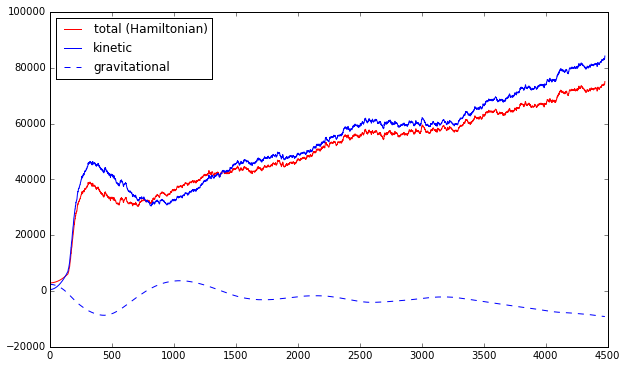

In [233]:
plt.figure(figsize=(10, 6))
plt.plot(T, total_kinetic_energy + total_gravitational_potential_energy, 'r')
plt.plot(T, total_kinetic_energy)
plt.plot(T, total_gravitational_potential_energy, '--b')
plt.legend(['total (Hamiltonian)', 'kinetic', 'gravitational'], loc=0)

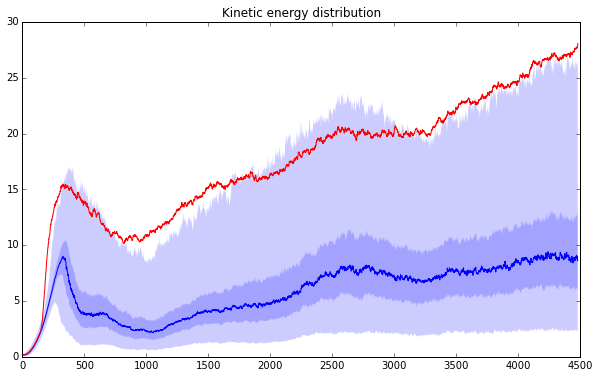

In [232]:
p = 0.8
plt.figure(figsize=(10, 6))
plt.fill_between(T, np.percentile(kinetic_energy, 100 - p*100, axis=1), np.percentile(kinetic_energy, p*100, axis=1), alpha=0.2, linewidth=0)
plt.fill_between(T, np.percentile(kinetic_energy, 100 - p/2*100, axis=1), np.percentile(kinetic_energy, p/2*100, axis=1), alpha=0.2, linewidth=0)
plt.plot(T, np.median(kinetic_energy, axis=1))
plt.plot(T, np.mean(kinetic_energy, axis=1), '-r')
plt.plot([T[0], T[-1]], [0, 0], ':k')
plt.title('Kinetic energy distribution')

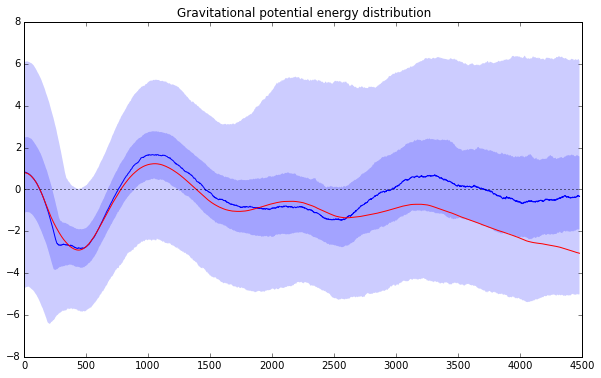

In [204]:
p = 0.8
plt.figure(figsize=(10, 6))
plt.fill_between(T, np.percentile(gravitational_potential_energy, 100 - p*100, axis=1), np.percentile(gravitational_potential_energy, p*100, axis=1), alpha=0.2, linewidth=0)
plt.fill_between(T, np.percentile(gravitational_potential_energy, 100 - p/2*100, axis=1), np.percentile(gravitational_potential_energy, p/2*100, axis=1), alpha=0.2, linewidth=0)
plt.plot(T, np.median(gravitational_potential_energy, axis=1))
plt.plot(T, np.mean(gravitational_potential_energy, axis=1), '-r')
plt.plot([T[0], T[-1]], [0, 0], ':k')
plt.title('Gravitational potential energy distribution')

Seems like the loss of potential energy at the end is due to particles having escaped the box.

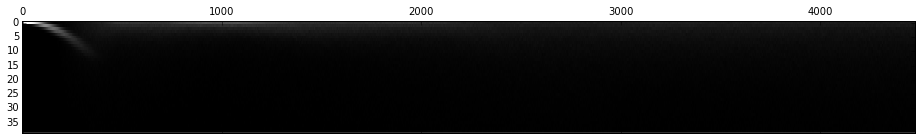

In [228]:
# THE PREVIOUS PLOTS ASSUMES UNIMODALITY. WE NEED TO SHOW A BETTER PLOT!!!

plt.figure(figsize=(10,6))
bins = range(40)
D = np.zeros(shape=(len(T),len(bins) - 1))
for i in range(len(T)):
    d, _ = np.histogram(kinetic_energy[i, :], bins=bins, density=True)
    D[i, :] = d
plt.matshow(D.T, interpolation='none', aspect='auto', cmap=plt.cm.gray)
#plt.yticks(range(len(bins)), bins)

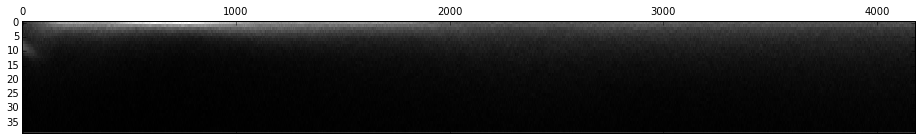

In [231]:
# Show after 300
plt.matshow(D.T[:, 300:], interpolation='none', aspect='auto', cmap=plt.cm.gray)

The system seems to have forgotten about initial conditions around t = 400.
The bright spot appears no matter the t0 we take. It hints at a growing energy accumulation resulting in a growing tail and a lowering of the mode as time progresses.

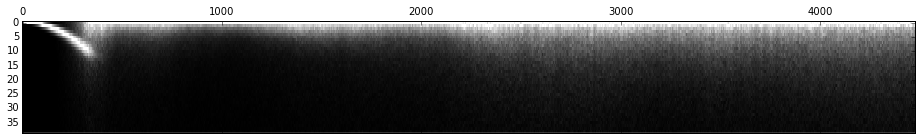

In [230]:
# Here we show unnormalized histograms. This means the color is not anymore the proba: we can only compare colors at same time.
plt.figure(figsize=(10,6))
Dn = D.copy()
for i in range(len(T)):
    Dn[i, :] = D[i, :]/np.max(D[i, :]) # Rescales
plt.matshow(Dn.T, interpolation='none', aspect='auto', cmap=plt.cm.gray)

(None, <matplotlib.text.Text at 0x12ebd7050>)

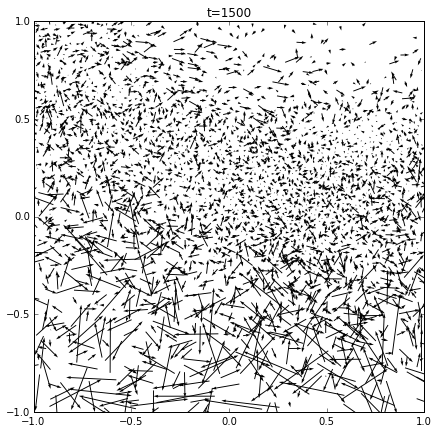

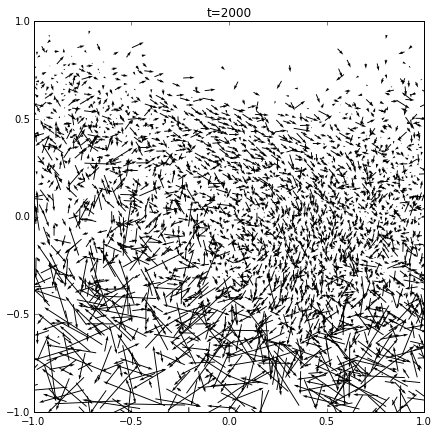

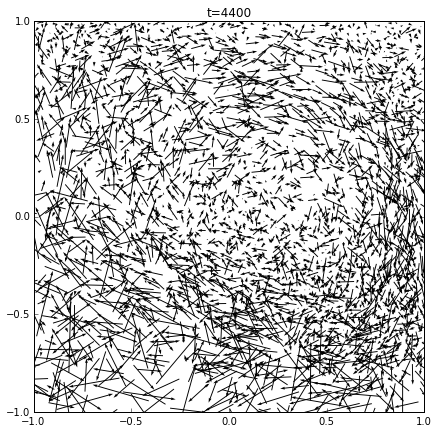

In [121]:
def plot_state(x):
    plt.figure(figsize=(7,7))
    plt.subplot(aspect='equal')
    #plt.scatter(x=x[:, 0], y=x[:, 1], c=np.linalg.norm(x[:, 2:4], axis=1), s=5, lw=0.3, cmap=plt.get_cmap('Reds'))
    plt.quiver(x[:, 0], x[:, 1], x[:, 2], x[:, 3], scale=100)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
plot_state(X[1000]), plt.title('t=1500')
plot_state(X[1500]), plt.title('t=2000')
plot_state(X[4400]), plt.title('t=4400')

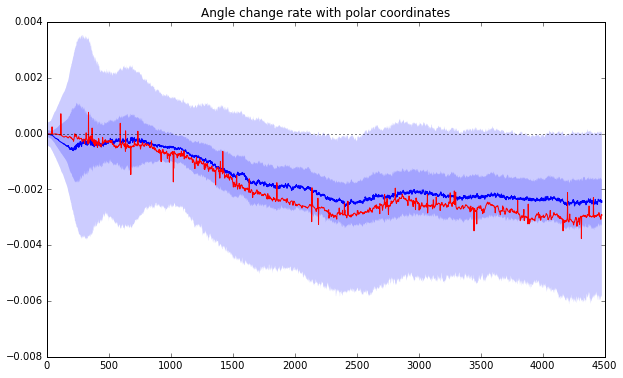

In [128]:
# Try with polar coordinates
p = 0.8
theta = np.arctan2(X[:, :, 1], X[:, :, 0])
theta_dot = np.mod(np.diff(theta, axis=0) + np.pi, 2*np.pi) - np.pi
plt.figure(figsize=(10, 6))
plt.fill_between(T[1:], np.percentile(theta_dot, 100 - p*100, axis=1), np.percentile(theta_dot, p*100, axis=1), alpha=0.2, linewidth=0)
plt.fill_between(T[1:], np.percentile(theta_dot, 100 - p/2*100, axis=1), np.percentile(theta_dot, p/2*100, axis=1), alpha=0.2, linewidth=0)
plt.plot(T[1:], np.median(theta_dot, axis=1))
plt.plot(T[1:], np.mean(theta_dot, axis=1), '-r')
plt.plot([T[0], T[-1]], [0, 0], ':k')
plt.title('Angle change rate with polar coordinates')

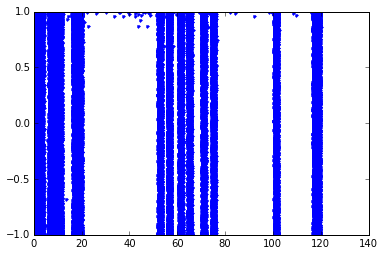

In [241]:
#TODO: Investigate spatial coupling/correlation over a distance r
#Some test here
N = X.shape[1]
t = 4000
C = []
for i in range(N):
    for j in range(N):
        if i>=j: continue
        c = np.dot(X[t, i, 2:4], X[t, j, 2:4]) / np.linalg.norm(X[t, i, 2:4]) / np.linalg.norm(X[t, j, 2:4])
        r = np.linalg.norm(X[t, i, 0:2] - X[t, j, 0:2])
        C.append([r, c])
C = np.array(C)
plt.plot(C[:, 0], C[:, 1], '.')
# TODO: Add kernel and ignore distances that are too big

(0, 1)

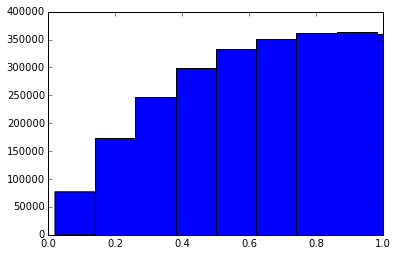

In [245]:
plt.hist(C[:, 0], 1000)
plt.xlim([0, 1])